# Demo of NMF-ARD-SO

####  [1] Motoki Shiga, Kazuyoshi Tatsumi, Shunsuke Muto, Koji Tsuda, Yuta Yamamoto, Toshiyuki Mori, Takayoshi Tanji, "Sparse Modeling of EELS and EDX Spectral Imaging Data by Nonnegative Matrix Factorization", Ultramicroscopy, Vol.170, p.43-59, 2016.
 <p>

In [1]:
%matplotlib inline
import time
from numpy import random
import scipy.io as sio
from skimage import io
from SpectrumImaging import *
import hyperspy.api as hs

In [2]:
#load theoretical data of Mn3O4 without noise
mat_dict = sio.loadmat('mn3o4_f2.mat')
ximage = mat_dict['datar']

# focusing channel
n_ch = np.arange(37-1,116);
ximage = ximage[:,:,n_ch];

# # of pixels along x and y axis, # of EELS channels
xdim,ydim,Nch = ximage.shape

#  generating pahtom data by adding gaussian noise
X = np.reshape(ximage, (xdim*ydim, Nch))
scale_spect = np.max(X)
s2_noise = 0.1  #noise variance
X = X + np.random.randn(xdim*ydim, Nch) * s2_noise * scale_spect;
X = (X + np.abs(X))/2;
scale_X = np.mean(X)
X = X / scale_X

# fix the random seed
random.seed(0)

In [3]:
num_comp = 10          # the number of component
wo = 0.05 #weight for orthogonality (0 <= wo <= 1)
param_a = 1+10**(-15)

C, S, L, lambdas, objs = nmf_ard_so(X, num_comp, wo, param_a, reps=5, itr_max=300)

Running NMF with ARD and Soft Orthogonal constraint....
0th iteration of NMF-ARD-SO algorithm
1th iteration of NMF-ARD-SO algorithm
2th iteration of NMF-ARD-SO algorithm
3th iteration of NMF-ARD-SO algorithm
4th iteration of NMF-ARD-SO algorithm


# Plot extracted components

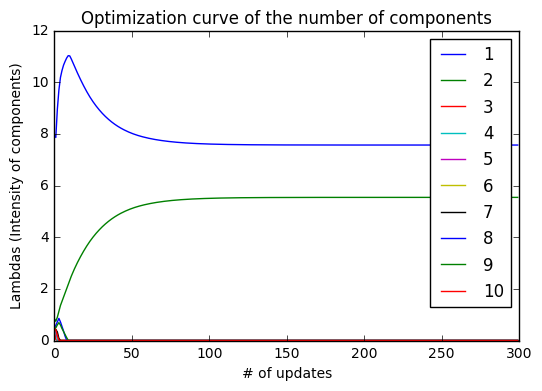

In [4]:
plt.figure()
for k in range(num_comp):
    plt.plot(lambdas[:,k],label=str(k+1))
plt.xlabel('# of updates')
plt.ylabel('Lambdas (Intensity of components)')
plt.title('Optimization curve of the number of components')
plt.legend()
plt.show()

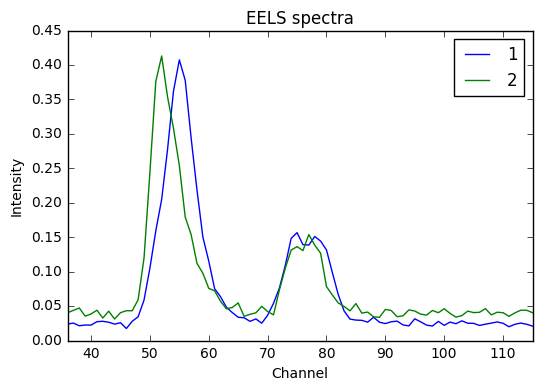

In [5]:
plt.figure()
num_comp_best = np.sum(L>10**(-5))  # the optimized number of components
for k in range(num_comp_best):
    S[:,k] = S[:,k] / (np.sqrt(S[:,k].T@S[:,k]) + 1e-16)
    plt.plot(n_ch, S[:,k],label=str(k+1))
plt.xlabel('Channel')
plt.ylabel('Intensity')
plt.xlim([n_ch[0], n_ch[-1]])
plt.title('EELS spectra')
plt.legend()
plt.show()

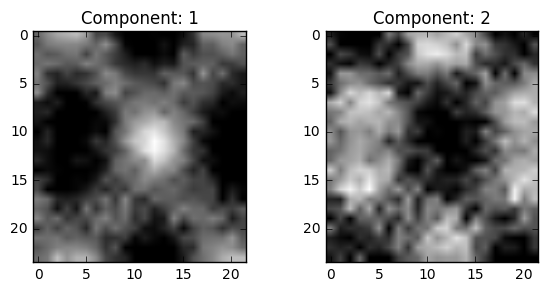

In [6]:
plt.figure(figsize=(6,3))
num_comp_best = np.sum(L>10**(-5))  # the optimized number of components
for k in range(num_comp_best):
    plt.subplot(100+num_comp_best*10+k+1)
    im = np.reshape(C[:,k],(xdim, ydim))
    plt.imshow(im)
    plt.title('Component: ' + str(k+1))
plt.tight_layout()
plt.show()